# 首先说明这个文本的格式
"""
ITEM: TIMESTEP
1270000
ITEM: NUMBER OF ATOMS
7440
ITEM: BOX BOUNDS pp pp pp
-2.4557308833747769e+00 1.1243281637773005e+02
-3.0190347094866166e-01 1.3822303470948729e+01
-1.2504507539069643e+00 5.7250450753906932e+01
ITEM: ATOMS id type q x y z vx vy vz fx fy fz c_Ke_atom c_Pe_atom v_E_total
5009 3 0.6 5.40833 5.33672 2.0368 10.0117 22.5805 30.7974 -1.28957 -0.586377 1.33167 0.560614 -2.20149 -1.64088

"""
本代码旨在读取文本中的数据，每一帧中的原子的信息要放在一个class中，然后所有原子放在
#一个列表中，这个最后每一帧的列表放在总的列表中供之后的处理使用


应该是可以按照选择的格式进行输出
id type q x y z vx vy vz fx fy fz c_Ke_atom c_Pe_atom v_E_total


In [1]:
# 文件路径
file_path = r'C:\Users\zhang\Desktop\crygrowth\0620分析数据\2400cry_2000p.lmp'

# 是否生成xyz文件
out_xyz = 0 

# 生成xyz文件的地址
out_path = r'C:\Users\zhang\Desktop\0622组会分析数据\Cry_2000p.lmp'
list_type = ['O','Nb','Li']

# 所有信息储存的总列表
list_all_frames = []

# 每一个原子的信息
class Atom:
    def __init__(self, id, type, q, x, y, z, vx, vy, vz, fx, fy, fz, c_ke_atom, c_pe_atom, v_e_total):
        self.id = id
        self.type = type
        self.x = x
        self.y = y
        self.z = z
        self.q = q
        self.c_ke_atom = c_ke_atom
        self.c_pe_atom = c_pe_atom
        self.v_e_total = v_e_total
        self.vx = vx
        self.vy = vy
        self.vz = vz
        self.fx = fx
        self.fy = fy
        self.fz = fz

In [2]:
# 格式分类
out_type = 'xyz'

In [3]:
# 打开文件并读取所有行数据
with open(file_path, 'r') as file:
    lines = file.readlines()
int(lines[3])

15000

In [4]:
# 打开文件并读取所有行数据
with open(file_path, 'r') as file:
    lines = file.readlines()
# 每一页的原子数
num_atom =int(lines[3])
# 定义一页的行数
lines_per_page = num_atom + 9
# 计算总页数
total_pages = (len(lines) + lines_per_page - 1) // lines_per_page
# 遍历每一页
for page in range(total_pages):
    # 计算当前页的起始行号和结束行号
    start_line = page * lines_per_page
    end_line = start_line + lines_per_page
    # 从总行数据中获取当前页的行数据
    page_lines = lines[start_line:end_line]
    ## 开始分析每一页中的数据
    # 每一页的数据存储在这个list中
    list_frame = []
    #print("Current frame number :",page)
    # 每一页的第九行开始才是原子数据
    for i_atom in page_lines[9:]:
        ii = i_atom.split()
        atom = Atom(int(ii[0]),int(ii[1]),float(ii[2]),float(ii[3]),float(ii[4]),float(ii[5]),float(ii[6]),float(ii[7]),float(ii[8])\
                    ,float(ii[9]),float(ii[10]),float(ii[11]),float(ii[12]),float(ii[13]),float(ii[14]))
        
        list_frame.append(atom)
    list_all_frames.append(list_frame)
# 输出文档中的其他信息
print('\nResult analysis completed')
print("Other information:")
print("Number of total frames:",total_pages)
print("Number of atoms:", lines[3].split()[0])
print('Box size:',round(float(lines[5].split()[1]),3))


Result analysis completed
Other information:
Number of total frames: 2001
Number of atoms: 15000
Box size: 109.108


In [5]:
# 生成xyz格式文件
import os
if out_xyz == 1:
    # 若文件存在则删除
    if os.path.exists(out_path):
        os.remove(out_path)
    # 打开文件，以追加模式打开
    with open(out_path, 'a') as file:
        for i in list_all_frames:
            file.write('6500\n')
            file.write('Atoms\n')
            # 每一帧当中的代码
            for ii in i:
                file.write(list_type[ii.type-1] +' '+ str(ii.x) + ' '+ str(ii.y)+' '+str(ii.z) +'\n')
    print('output has been completed')

# 分析ke，pe，以及e_total三种能量的分布情况

In [12]:
# 分析数据选项
ana_frame = 1600

# 分析类别 1是总能量，2是动能，3是势能
#  11vx, 12vy, 13vz,   21fx, 22fy, 23fz
ana_type_num = 1

# 分析原子的类型
ana_element_type = ['2']

# 切分份数
x_split_size = 80
y_split_size = 60

In [13]:
# 读取数据，假设x和y分别为x轴和y轴的数据，z为能量数据
list_x = []
list_y = []
list_z = []
list_pe = []
list_ke = []
list_e_total = []
list_vx,list_vy,list_vz = [], [], []
list_fx, list_fy, list_fz = [], [], []

# 分析能量值 pe ke or e_total
if ana_type_num == 1:
    ana_type = 'Total energy'
elif ana_type_num == 2:
    ana_type = 'Knetic energy'
elif ana_type_num == 3:
    ana_type = 'Potential energy'
elif ana_type_num == 11:
    ana_type = 'Velocity_x'
elif ana_type_num == 12:
    ana_type = 'Velocity_y'
elif ana_type_num ==13:
    ana_type = 'Velocity_z'
elif ana_type_num == 21:
    ana_type = 'Acceleration_x'
elif ana_type_num == 22:
    ana_type = 'Acceleration_y'
elif ana_type_num == 23:
    ana_type = 'Acceleration_z'
    
    
# 此处并不是把每一帧的数据都放进去，而是选择某一帧进行分析
i = list_all_frames[ana_frame]
for ii in i:
    # 先筛选元素
    if str(ii.type) in ana_element_type:   
        list_x.append(ii.x)    
        list_y.append(ii.y)
        list_z.append(ii.z)
        # 再筛选类型 
        if ana_type_num == 1:
            list_e_total.append(ii.v_e_total)
        elif ana_type_num==2:
            list_ke.append(ii.c_ke_atom)
        elif ana_element_type==3:
            list_pe.append(ii.c_pe_atom)
        elif ana_type_num ==21:
            list_fx.append(ii.fx)
        elif ana_type_num==22:
            list_fy.append(ii.fy)
        elif ana_type_num==23:
            list_fz.append(ii.fz)
        elif ana_type_num==11:
            list_vx.append(ii.vx)
        elif ana_type_num==12:
            list_vy.append(ii.vy)
        elif ana_type_num==13:
            list_vz.append(ii.vz)
        else:
            print('Input Error!')

In [14]:
len(list_all_frames)

2001

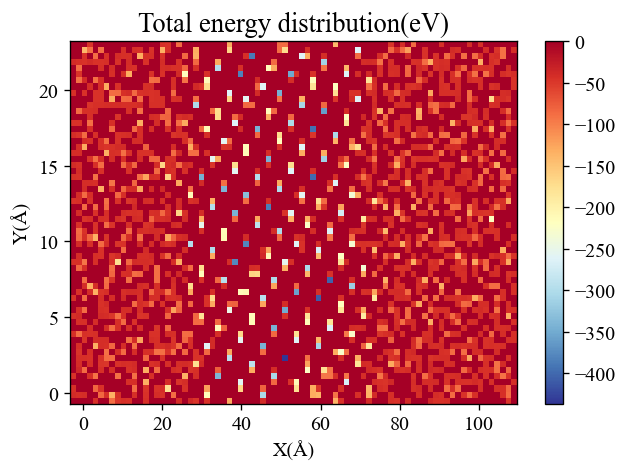

Analysis frame: 1600
Analysis type: Total energy  Total energy: -130022.16269999999


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
# 设置局部字体
font = FontProperties()
font.set_family('Times New Roman')
# 创建绘图窗口
fig = plt.figure(dpi=120)

# 将x，y，energy转化为numpy数组
x = np.array(list_x)
y = np.array(list_y)

# 辨别分析的能量类型
energy = []
if ana_type_num == 1:
    energy = np.array(list_e_total)
elif ana_type_num==2:
    energy = np.array(list_ke)
elif ana_type_num==3:    
    energy = np.array(list_pe)
elif ana_type_num==11:
    energy = np.array(list_vx)
elif ana_type_num==12:
    energy = np.array(list_vy)
elif ana_type_num==13:
    energy = np.array(list_vz)
elif ana_type_num ==21:
    energy = np.array(list_fx)
elif ana_type_num==22:
    energy = np.array(list_fy)
elif ana_type_num==23:
    energy = np.array(list_fz)
else:
    print('Input Error!')

# 设置xy网格
x_grid = np.linspace(x.min(), x.max(), x_split_size)
y_grid = np.linspace(y.min(), y.max(), y_split_size)
X, Y = np.meshgrid(x_grid, y_grid)

# 计算每个网格上的总能量
total_energy = np.zeros_like(X)
for i in range(len(x)):
    # 找到x，y所在的网格
    x_idx = np.abs(x_grid - x[i]).argmin()
    y_idx = np.abs(y_grid - y[i]).argmin()
    # 将能量加到所在网格上
    total_energy[y_idx, x_idx] += energy[i]

plt.xlabel('X(Å)', fontproperties=font, fontsize=12)
plt.ylabel('Y(Å)', fontproperties=font, fontsize=12)

# 绘制能量分布图
plt.pcolormesh(X, Y, total_energy,cmap= 'RdYlBu_r')
plt.colorbar()
title_name = ana_type + ' distribution(eV)'

plt.title(title_name,fontproperties=font, fontsize=16)


#
plt.show()

# 计算总能量
print('Analysis frame:',str(ana_frame))
total_energy_sum = np.sum(total_energy)
print('Analysis type:',ana_type,' Total energy:',total_energy_sum)

# 统计晶体区域和非晶区域的能量差别

In [94]:
ana_num =  1600

c_x1,c_x2 = 40,60
g_x1,g_x2 = 100,110
# 分析元素类型
# 1O 2Nb   3 Li
sts_element = 2
# 分析能量类型
# 1e  2pe    3ke
sts_type = 1

In [95]:
# 统计两个区域原子的信息
list_location = list_all_frames[ana_num]
list_glass_e = []
list_glass_x = []
list_cry_e = []
list_cry_x = []
for i in list_location:
    # 晶体区域
    if c_x1<i.x<c_x2 and i.type== sts_element:
        list_glass_e.append([i.v_e_total,i.c_pe_atom,i.c_ke_atom])
        list_glass_x.append(i.x)
    elif g_x1 <i.x< g_x2 and i.type==sts_element:
        list_cry_e.append([i.v_e_total,i.c_pe_atom,i.c_ke_atom])
        list_cry_x.append(i.x)

In [96]:
# 筛选出需要分析的能量类型
sts_titleName = 'None'
sts_glass_e,sts_cry_e =[],[]
# 补足画图所用的横坐标
glass_x,cry_x = [],[]
ii = 0
for i in list_glass_e:
    glass_x.append(ii)
    ii+=1
    if sts_type == 1:
        sts_titleName = "Total Energy"
        sts_glass_e.append(i[0])
    elif sts_type == 2:
        sts_titleName = "Potential Energy"
        sts_glass_e.append(i[1])
    elif sts_type == 3:
        sts_titleName = "Knetic Energy"
        sts_glass_e.append(i[2])
# 再统计
jj = 0
for i in list_cry_e:
    cry_x.append(jj)
    jj+=1
    if sts_type == 1:
        sts_cry_e.append(i[0])
    elif sts_type == 2:
        sts_cry_e.append(i[1])
    elif sts_type == 3:
        sts_cry_e.append(i[2])

Atom's number in crystals: 235  Atom's number in crystals: 559


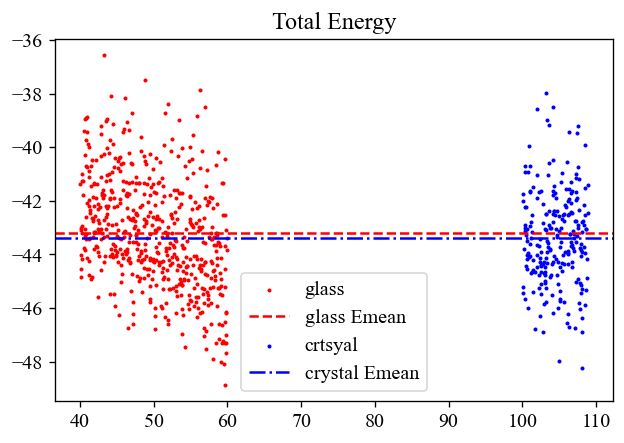

In [97]:
import statistics

plt.figure(dpi=120)
# 玻璃区域

plt.scatter(list_glass_x,sts_glass_e, c='r',s=2,label= 'glass')
# 绘制 均值水平线
plt.axhline(statistics.mean(sts_glass_e), color='red', linestyle='--',label='glass Emean')
# 绘制 中位数水平线
#plt.axhline(statistics.median(sts_glass_e), color='red', linestyle='-.',label='glass Emedian')

# 晶体区域
plt.scatter(list_cry_x, sts_cry_e, c='b',s=2,label="crtsyal")
# 绘制 均值水平线
plt.axhline(statistics.mean(sts_cry_e), color='b', linestyle='-.',label='crystal Emean')
# 绘制 中位数水平线
#plt.axhline(statistics.median(sts_cry_e), color='b', linestyle='--',label='cry Emedian')
plt.title(sts_titleName)
print('Atom\'s number in crystals:',len(sts_cry_e),' Atom\'s number in crystals:',len(sts_glass_e))
plt.legend()
plt.show()

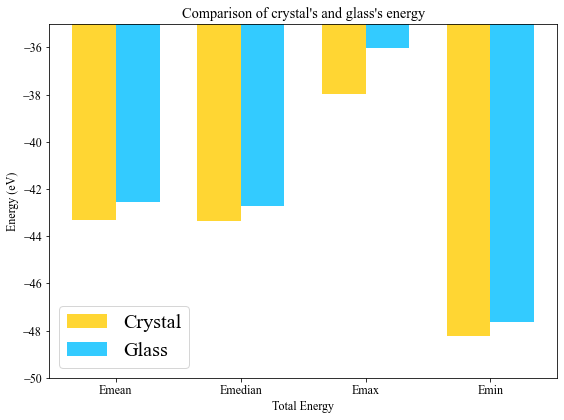

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# 示例数据
categories= ['Emean','Emedian','Emax','Emin']
value_cry = [round(statistics.mean(sts_cry_e),3),statistics.median(sts_cry_e),max(sts_cry_e),min(sts_cry_e)]
value_glass = [round(statistics.mean(sts_glass_e),3),statistics.median(sts_glass_e),max(sts_glass_e),min(sts_glass_e)]

# 设置柱状图的宽度
bar_width = 0.35

# 计算两类数据的柱状图位置
bar_pos1 = np.arange(len(categories))
bar_pos2 = [x + bar_width for x in bar_pos1]

# 创建柱状图
fig, ax = plt.subplots()

# 绘制柱状图1
rects1 = ax.bar(bar_pos1, value_cry, bar_width,
                alpha=0.8,
                color='#FFCC00',
                label='Crystal')

# 绘制柱状图2
rects2 = ax.bar(bar_pos2, value_glass, bar_width,
                alpha=0.8,
                color='deepskyblue',
                label='Glass')
fig.set_size_inches(8, 6)
# 添加轴标签和标题
ax.set_xlabel(sts_titleName)
ax.set_ylabel('Energy (eV)')
ax.set_title('Comparison of crystal\'s and glass\'s energy')
ax.set_xticks(bar_pos1 + bar_width/2)
ax.set_xticklabels(categories)
# 
ax.set_ylim(-50,-35)
ax.legend(loc = 'lower left',prop={'size': 20})
# 显示图形
plt.tight_layout()
plt.show()


In [43]:
print("数据详情")
print("晶体区域能量分析 极大值: ",max(sts_cry_e)," 极小值: ",min(sts_cry_e)," 均值: ",round(statistics.mean(sts_cry_e),3)," 中位数:",statistics.median(sts_cry_e))
print("玻璃区域能量分析 极大值: ",max(sts_glass_e)," 极小值: ",min(sts_glass_e)," 均值: ",round(statistics.mean(sts_glass_e),3)," 中位数:",statistics.median(sts_glass_e))
print("对比分析")
print("均值差异:",round(statistics.mean(sts_glass_e)-statistics.mean(sts_cry_e),3))
print("中位数差异:",round(statistics.median(sts_glass_e)-statistics.median(sts_cry_e),3))


数据详情
晶体区域能量分析 极大值:  -37.9709  极小值:  -48.241  均值:  -43.32  中位数: -43.3602
玻璃区域能量分析 极大值:  -36.011  极小值:  -47.6397  均值:  -42.547  中位数: -42.707049999999995
对比分析
均值差异: 0.773
中位数差异: 0.653


In [44]:
import pandas as pd


df1 = pd.DataFrame(list_cry_e)
# 使用describe()函数计算统计量
statistics1 = df1.describe()

df2 = pd.DataFrame(list_glass_e)
# 使用describe()函数计算统计量
statistics2 = df2.describe()

print('cry_total_e:\n',statistics1)

print('glass_total_e:\n',statistics2)

cry_total_e:
                 0           1           2
count  372.000000  372.000000  372.000000
mean   -43.319919  -43.647049    0.327132
std      1.804848    1.758794    0.287627
min    -48.241000  -48.297100    0.002453
25%    -44.545025  -44.807325    0.123797
50%    -43.360200  -43.650800    0.249957
75%    -42.122700  -42.433000    0.439410
max    -37.970900  -38.265100    1.831700
glass_total_e:
                 0           1           2
count  552.000000  552.000000  552.000000
mean   -42.546517  -42.872566    0.326053
std      1.938298    1.952494    0.255784
min    -47.639700  -47.836400    0.005678
25%    -43.979050  -44.263975    0.131842
50%    -42.707050  -43.074300    0.247679
75%    -41.315275  -41.705425    0.469072
max    -36.011000  -36.202500    1.596690


In [27]:
# 计算晶体区域和非晶区域的能量差别
e_cry = 0
count_cry_atom = 0

g_count_ele = {'1':0,'2':0, '3':0}
c_count_ele = {'1':0,'2':0, '3':0}

g_e_dic = {'Nb_total_e':0 ,'Nb_ave_e':0 ,'Nb_all_Ke':0 ,'Nb_ave_ke':0  ,'Nb_all_pe':0  ,'Nb_ave_pe':0,
           'Li_total_e':0 ,'Li_ave_e':0 ,'Li_all_Ke':0 ,'Li_ave_ke':0  ,'Li_all_pe':0  ,'Li_ave_pe':0,
           'O_total_e':0  ,'O_ave_e':0  ,'O_all_Ke':0  ,'O_ave_ke':0    ,'O_all_pe':0  ,'O_ave_pe':0}

c_e_dic = {'Nb_total_e':0,'Nb_ave_e':0,'Nb_all_Ke':0,'Nb_ave_ke':0,'Nb_all_pe':0,'Nb_ave_pe':0,
           'Li_total_e':0, 'Li_ave_e':0,'Li_all_Ke':0,'Li_ave_ke':0,'Li_all_pe':0,'Li_ave_pe':0,
           'O_total_e':0,'O_ave_e':0,'O_all_Ke':0,'O_ave_ke':0,'O_all_pe':0,'O_ave_pe':0}
# 
e_glass = 0
count_glass_atom = 0

cal_list = list_all_frames[ana_num]

# 计算区域的总能量
for i in cal_list:
    # cry 50-60
    if c_x1<i.x<c_x2:
        count_cry_atom+=1
        e_cry+=i.v_e_total
        
        if i.type == 1:
            c_count_ele['1']+=1
            c_e_dic['O_total_e'] += i.v_e_total
            c_e_dic['O_all_Ke'] += i.c_ke_atom
            c_e_dic['O_all_pe'] += i.c_pe_atom
            
        if i.type == 2:
            c_count_ele['2']+=1
            c_e_dic['Nb_total_e'] += i.v_e_total
            c_e_dic['Nb_all_Ke'] += i.c_ke_atom
            c_e_dic['Nb_all_pe'] += i.c_pe_atom
        if i.type == 3:
            c_count_ele['3']+=1
            c_e_dic['Li_total_e'] += i.v_e_total
            c_e_dic['Li_all_Ke'] += i.c_ke_atom
            c_e_dic['Li_all_pe'] += i.c_pe_atom
            
    elif g_x1 <i.x< g_x2:
        count_glass_atom+=1
        e_glass+=i.v_e_total
        
        if i.type == 1:
            g_count_ele['1']+=1
            g_e_dic['O_total_e'] += i.v_e_total
            g_e_dic['O_all_Ke'] += i.c_ke_atom
            g_e_dic['O_all_pe'] += i.c_pe_atom
            
        if i.type == 2:
            g_count_ele['2']+=1
            g_e_dic['Nb_total_e'] += i.v_e_total
            g_e_dic['Nb_all_Ke'] += i.c_ke_atom
            g_e_dic['Nb_all_pe'] += i.c_pe_atom
        if i.type == 3:
            g_count_ele['3']+=1
            g_e_dic['Li_total_e'] += i.v_e_total
            g_e_dic['Li_all_Ke'] += i.c_ke_atom
            g_e_dic['Li_all_pe'] += i.c_pe_atom
            
print('分析第',ana_num,'帧')        
print('晶体中所有元素的平均总能量：',e_cry/count_cry_atom,' 玻璃中所有元素的平均总能量：',e_glass/count_glass_atom)
print('等体积中晶体和玻璃的原子数量:')
print('晶体：',count_cry_atom,' 玻璃：',count_glass_atom)
print('晶体中原子数分布 ','Nb:',c_count_ele['2'],' O:',c_count_ele['1'],' Li: ',c_count_ele['3'])
print('玻璃中原子数分布 ','Nb:',g_count_ele['2'],' O:',g_count_ele['1'],' Li: ',g_count_ele['3'],'\n')
print('晶体中不同元素的能量对比','Nb原子平均总能:',c_e_dic['Nb_total_e']/c_count_ele['2'],' Nb原子平均动能：',c_e_dic['Nb_all_Ke']/c_count_ele['2'],' Nb原子平均势能：',c_e_dic['Nb_all_pe']/c_count_ele['2'])
print('玻璃中不同元素的能量对比','Nb原子平均总能:',g_e_dic['Nb_total_e']/g_count_ele['2'],' Nb原子平均动能：',g_e_dic['Nb_all_Ke']/g_count_ele['2'],' Nb原子平均势能：',g_e_dic['Nb_all_pe']/g_count_ele['2'],)
print(' ')
print('晶体中不同元素的能量对比','O原子平均总能:',c_e_dic['O_total_e']/c_count_ele['1'],' O原子平均动能：',c_e_dic['O_all_Ke']/c_count_ele['1'],' O原子平均势能：',c_e_dic['O_all_pe']/c_count_ele['1'])
print('玻璃中不同元素的能量对比','O原子平均总能:',g_e_dic['O_total_e']/g_count_ele['1'],' O原子平均动能：',g_e_dic['O_all_Ke']/g_count_ele['1'],' O原子平均势能：',g_e_dic['O_all_pe']/g_count_ele['1'])
print(' ')
print('晶体中不同元素的能量对比','Li原子平均总能:',c_e_dic['Li_total_e']/c_count_ele['3'],' Li原子平均动能：',c_e_dic['Li_all_Ke']/c_count_ele['3'],' Li原子平均势能：',c_e_dic['Li_all_pe']/c_count_ele['3'])
print('玻璃中不同元素的能量对比','Li原子平均总能:',g_e_dic['Li_total_e']/g_count_ele['3'],' Li原子平均动能：',g_e_dic['Li_all_Ke']/g_count_ele['3'],' Li原子平均势能：',g_e_dic['Li_all_pe']/g_count_ele['3'])




分析第 1600 帧
晶体中所有元素的平均总能量： -13.8206374215263  玻璃中所有元素的平均总能量： -13.751822734816088
等体积中晶体和玻璃的原子数量:
晶体： 2778  玻璃： 1169
晶体中原子数分布  Nb: 552  O: 1671  Li:  555
玻璃中原子数分布  Nb: 235  O: 698  Li:  236 

晶体中不同元素的能量对比 Nb原子平均总能: -42.54651666666661  Nb原子平均动能： 0.32605341302536195  Nb原子平均势能： -42.87256557971016
玻璃中不同元素的能量对比 Nb原子平均总能: -43.381059148936195  Nb原子平均动能： 0.3357372370212766  Nb原子平均势能： -43.71679319148932
 
晶体中不同元素的能量对比 O原子平均总能: -8.302036128067027  O原子平均动能： 0.3169396152004781  O原子平均势能： -8.618975200478745
玻璃中不同元素的能量对比 O原子平均总能: -7.705272564469915  O原子平均动能： 0.31661547259598866  O原子平均势能： -8.021888008595988
 
晶体中不同元素的能量对比 Li原子平均总能: -1.8654976342342342  Li原子平均动能： 0.32595221536936947  Li原子平均势能： -2.191450046846848
玻璃中不同元素的能量对比 Li原子平均总能: -2.1315746906779665  Li原子平均动能： 0.29592684012711873  Li原子平均势能： -2.427501779661016


# 分析单个粒子的能量变化

In [28]:
# 分析原子id（类型用来检查）
ana_element_index = 11653
ana_element_index_type = 3
# 分析起始位置和步长
start_frame_ana_e = 0
end_frame_ana_e = 2000
step_frame_ana_e = 20
# 分析类型有 1e  2pe  3ke
ana_energy_type = 1

In [29]:
# 记录粒子的时间和能量的列表
single_energy_list_e_y = []
single_energy_list_time_x = []
for i_e in range(start_frame_ana_e,end_frame_ana_e,step_frame_ana_e):
    # 取出一帧
    list_temp = list_all_frames[i_e]
    # 找到关注的原子
    for ii_e in list_temp:
        if ii_e.id == ana_element_index:
            # list[e,pe,ke]
            single_energy_list_e_y.append([ii_e.v_e_total,ii_e.c_pe_atom,ii_e.c_ke_atom])
            single_energy_list_time_x.append(i_e)

In [30]:
list_e,list_pe,list_ke = [],[],[]
for i in single_energy_list_e_y:
    list_e.append(i[0])
    list_pe.append(i[1])
    list_ke.append(i[2])

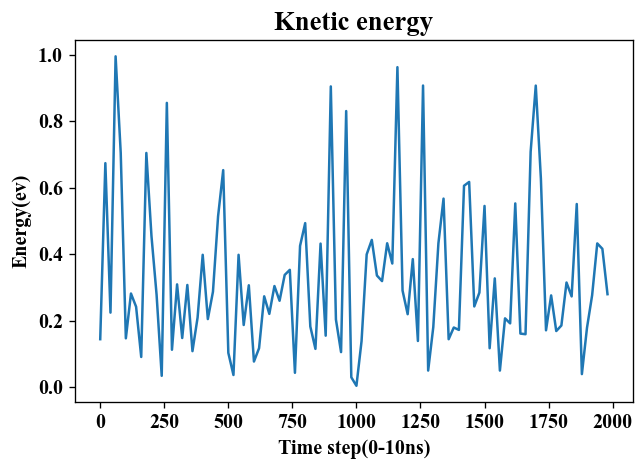

In [33]:
# 分析类型有 1e  2pe  3ke
ana_energy_type = 3
# 画图
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


# 设置局部字体
font = FontProperties()
font.set_family('Times New Roman')
# 设置字体加粗
font.set_weight('bold')
font.set_size(12)
# 创建绘图窗口
# 创建绘图窗口
# 根据分析类型加上名称
if ana_energy_type == 1:
    title_name1 = 'Total Energy'
    list_y_temp = list_e 
elif ana_energy_type == 2:
    title_name1 = 'Potential energy'
    list_y_temp = list_pe
else:
    title_name1 = 'Knetic energy'
    list_y_temp = list_ke 
    
    
fig = plt.figure(dpi=120)
plt.plot(single_energy_list_time_x, list_y_temp)
plt.title(title_name1,fontproperties=font,fontsize=16)
# 设置 X 轴和 Y 轴坐标数字的字体为加粗
plt.xlabel('Time step(0-10ns)', fontproperties=font, fontsize=12)
plt.ylabel('Energy(ev)', fontproperties=font, fontsize=12)

plt.xticks(fontproperties=font)
plt.yticks(fontproperties=font)
plt.show()

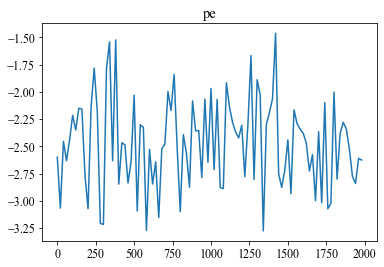

In [36]:
# 画图
plt.title('pe')
plt.plot(single_energy_list_time_x,list_pe)
plt.show()

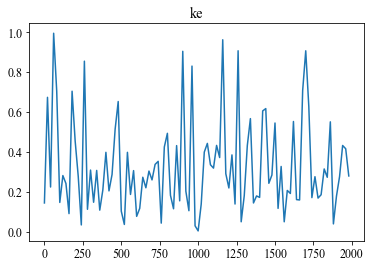

In [37]:
plt.title('ke')
plt.plot(single_energy_list_time_x,list_ke)
plt.show()